In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
normal1_small = pd.read_csv("2023-07-07_weaver_streambench_normal_++_np1.csv")
normal1_large = pd.read_csv("2023-07-10_weaver_streambench_normal_++_np1.csv")
normal1 = pd.concat([normal1_small, normal1_large])

remote1_small = pd.read_csv("2023-07-07_weaver_streambench_remote_++_np1.csv")
remote1_large = pd.read_csv("2023-07-10_weaver_streambench_remote_++_np1.csv")
remote1 = pd.concat([remote1_small, remote1_large])

unmngd1_small = pd.read_csv("2023-07-10_weaver_streambench_unmngd_++_small_np1.csv")
unmngd1_large = pd.read_csv("2023-07-10_weaver_streambench_unmngd_++_large_np1.csv")
unmngd1 = pd.concat([unmngd1_small, unmngd1_large])

npn = pd.read_csv("2023-07-10_weaver_streambench_stream_npn.csv")
npr = pd.read_csv("2023-07-10_weaver_streambench_stream_npr.csv")
npu = pd.read_csv("2023-07-10_weaver_streambench_stream_npu.csv")
rpn = pd.read_csv("2023-07-10_weaver_streambench_stream_rpn.csv")
rpr = pd.read_csv("2023-07-10_weaver_streambench_stream_rpr.csv")
rpu = pd.read_csv("2023-07-10_weaver_streambench_stream_rpu.csv")
upn = pd.read_csv("2023-07-10_weaver_streambench_stream_upn.csv")
upr = pd.read_csv("2023-07-10_weaver_streambench_stream_upr.csv")
upu = pd.read_csv("2023-07-10_weaver_streambench_stream_upu.csv")

mpi2 = pd.read_csv("2023-07-11_weaver_streambench_mpi_np2.csv")
rma2 = pd.read_csv("2023-07-11_weaver_streambench_rma_np2.csv")

In [17]:
def calculate_new_attrs_oldver(df):
    df["size"] = 1.0*df["n"]
    df["UPs-mean"] = df["size"]*df["N"]/df["time_stream-mean"]
    df["GUPs-mean"] = 1e-9*df["UPs-mean"]

In [18]:
def calculate_new_attrs(df):
    df["size"] = 1.0*df["n"]
    df["UPs-mean"] = df["size"]*df["iterations"]/df["time_stream-mean"]
    df["GUPs-mean"] = 1e-9*df["UPs-mean"]

In [19]:
calculate_new_attrs_oldver(normal1)
calculate_new_attrs_oldver(remote1)
calculate_new_attrs_oldver(unmngd1)
calculate_new_attrs(npn)
calculate_new_attrs(npr)
calculate_new_attrs(npu)
calculate_new_attrs(rpn)
calculate_new_attrs(rpr)
calculate_new_attrs(rpu)
calculate_new_attrs(upn)
calculate_new_attrs(upr)
calculate_new_attrs(upu)
calculate_new_attrs(mpi2)
calculate_new_attrs(rma2)

In [20]:
dfspp = [normal1, remote1, unmngd1]
labelspp = ["Kokkos (normal) View", "Kokkos Remote View", "Kokkos Unmanaged View"]
dfsstr = [npn,npr,npu,rpn,rpr,rpu,upn,upr,upu]
labelsstr = ["normal += normal",
             "normal += remote",
             "normal += unmngd",
             "remote += normal",
             "remote += remote",
             "remote += unmngd",
             "unmngd += normal",
             "unmngd += remote",
             "unmngd += unmngd"]
dfs2 = [mpi2, rma2]
labels2 = ["mpi 2-node", "rma 2-node"]

In [21]:
def figure_for_attribute(dfs, labels, attribute, ylabel = None, title = None):
    if ylabel is None:
        ylabel = attribute
    
    if title is None:
        title = f"update benchmark ({attribute.replace('_',' ')})"
    
    if len(dfs) == 0:
        print("required to have at least one line to plot")
    
    maxy = 0
    for df in dfs:
        cur_max = max(df[f"{attribute}-mean"])
        if cur_max > maxy:
            maxy = cur_max
    
    if labels is None:
        print("required to label each line")
        
    plt.figure(figsize=[10,6])
    for df, dflabel in zip(dfs,labels):
        plt.plot(df["n"], df[f"{attribute}-mean"], "--", label=dflabel)
    plt.title(title)
    plt.legend()
    plt.xlabel("problem size (cubic array of size n)")
    plt.ylabel(ylabel)
    plt.ylim(0,int((maxy+1)*1.05))
    plt.show()

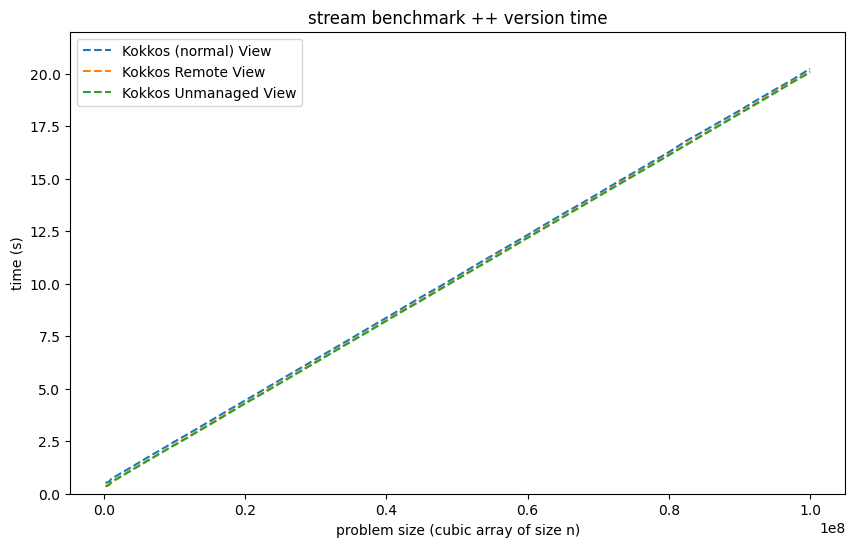

In [22]:
figure_for_attribute(dfspp, labelspp, "time_stream", "time (s)", title = "stream benchmark ++ version time")

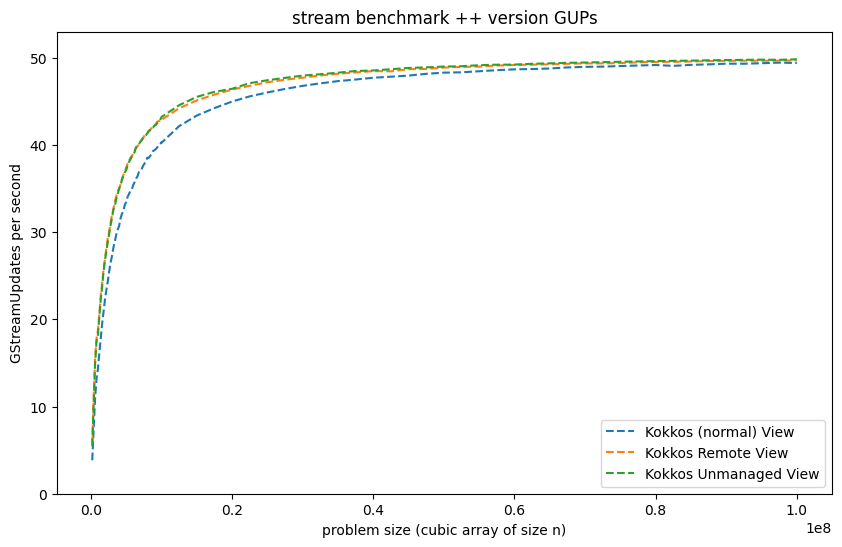

In [23]:
figure_for_attribute(dfspp, labelspp, "GUPs", "GStreamUpdates per second", "stream benchmark ++ version GUPs")

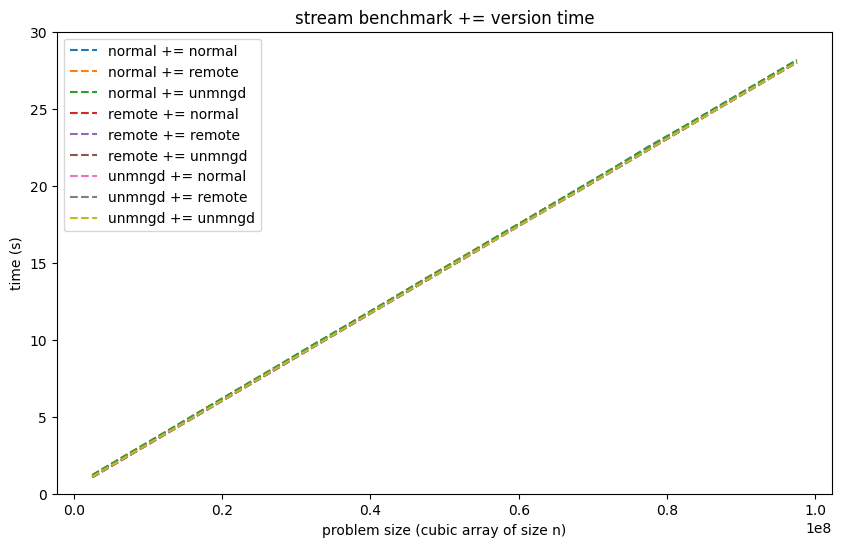

In [24]:
figure_for_attribute(dfsstr, labelsstr, "time_stream", "time (s)", title = "stream benchmark += version time")

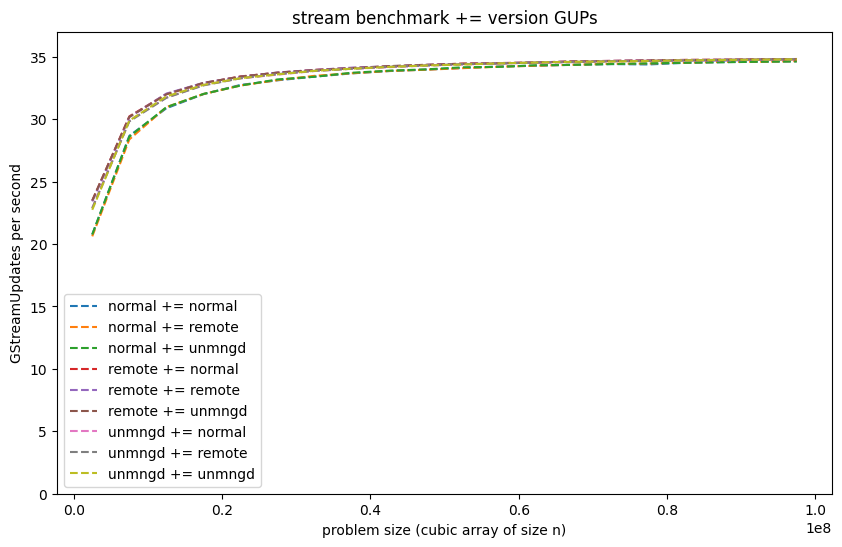

In [25]:
figure_for_attribute(dfsstr, labelsstr, "GUPs", "GStreamUpdates per second", "stream benchmark += version GUPs")

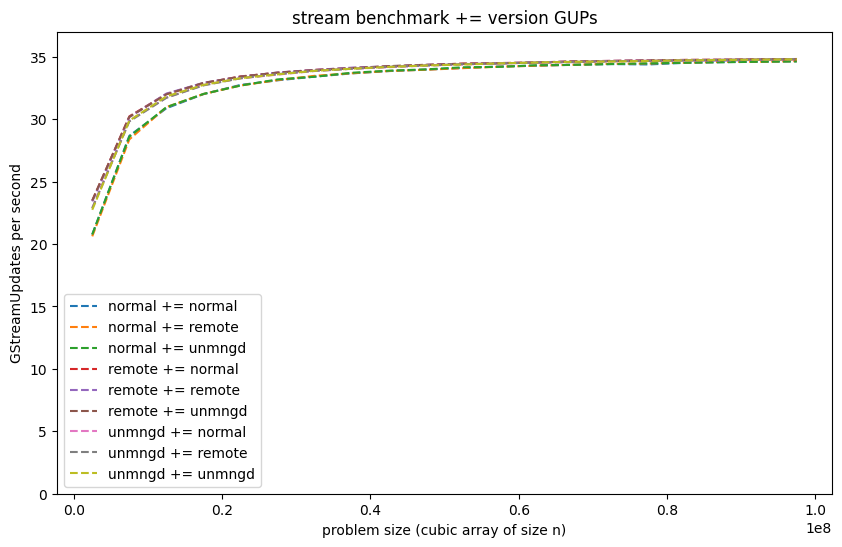

In [25]:
figure_for_attribute(dfs2, labels2, "time_stream", "time (s)", "rma benchmark time")

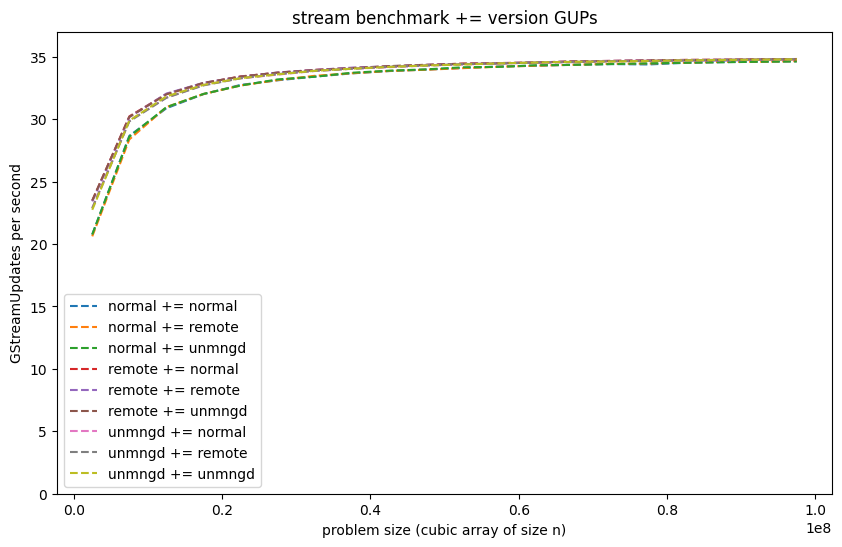

In [25]:
figure_for_attribute(dfs2, labels2, "GUPs", "GStreamUpdates per second", "rma benchmark GUPs")